OVER szakaszai

1. PARTITION BY - oszlopokat vagy kifejezéseket adunk meg, mint a GROUP BY esetén.
2. ORDER BY - Az ablakozás rendezettségét lehet definiálni, egyes ablakozó fgv-knél kötelező
3. ROWS / RANGE - Az ablakot sor pozícióval vagy érték tartománnyal lehet definiálni
1. PRECEDING - Az ablak felső szélének definiálása (Az alsó széle az aktuális sor)
2. BETWEEN - Az ablak felső és alsó szélének definiálása
1. Felső sor pozíció : PRECEDING / UNBOUNDED PRECEGING / CURRENT ROW
2. Alsó sor pozíció : FOLLOWING / UNBOUNDED FOLLOWING / CURRENT RO

A ROWS esetében egy konkrét számot kell megadni.

  

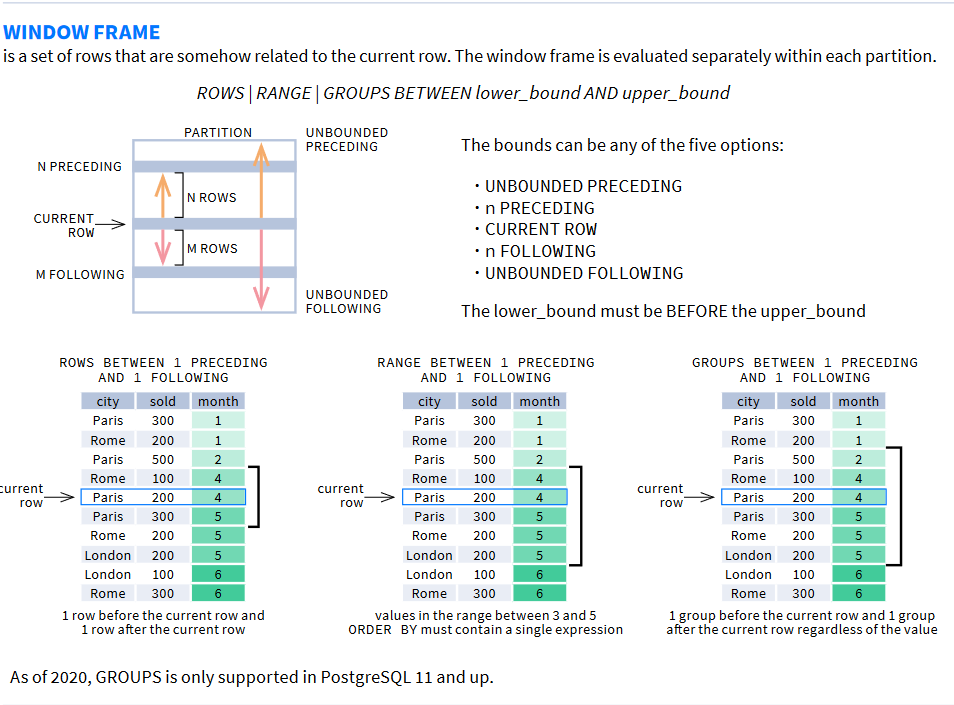

In [1]:
SELECT
    OrderID,
    SubTotal,
    row_number()    over(order by Subtotal) as [RowNumber],
    rank()          over(order by Subtotal) as [Rank],
    dense_rank()    over(order by Subtotal) as [Dense_Rank],
    ntile(2)        over(order by Subtotal) as [Ntile],
    percent_rank()  over(order by Subtotal) as [PercentRank]
FROM Orders
WHERE OrderID in (43660, 43659, 43664, 60123, 74139)
ORDER by SubTotal

(5 rows affected)

Total execution time: 00:00:00.071

OrderID,SubTotal,RowNumber,Rank,Dense_Rank,Ntile,PercentRank
43660,"1294,2529",1,1,1,1,0
60123,"2398,48",2,2,2,1,"0,25"
74139,"2398,48",3,2,2,1,"0,25"
43659,"20565,6206",4,4,3,2,"0,75"
43664,"24432,6088",5,5,4,2,1


Ha az érték azonos, akkor az ablakozó order by-ban definiálni kell még egy rendszési feltételt a sorszámozáshoz, hogy 1értelmű legyen.

  

RANK (Rangsor)

Az érték nagysága szerint sorszámoz. Ha az érték egyforma akkor ugyanaz lesz az sorszám, de a közbeeső sorszám nem jelenik meg. (3)

Itt is igaz, hogy az order by-ban determinisztikussá lehet tenni a sorszám értékét, ha megadunk több rendezési feltételt.

  

DENSE RANK

Itt már nem esik ki a 3. hely...

  

NTILE

Egyenlő részekre osztja fel a sorokat. Pl, ha 100 soros az eredményhalmaz, akkor ntile(10) -\> 10 csoportot képez 1-10 ig egyforma számozással.

Paramétere egész szám, azt jelenti, hogy hány rész kell képezni.

  

PERCENT RANK

0-1 közötti értékekre bontja le a sorszámot.